# Energy Reporter basic Analysis

## Energy Reporter Data
This dataset was made by **geoimpact AG** , **WWF Switzerland** and **EnergySwiss** using data from [OFROU](https://www.astra.admin.ch/astra/fr/home.html) and [swisstopo](https://www.swisstopo.admin.ch/). This dataset contains government data that describes how advanced each swiss municipality is in terms of renewable energy. The dataset has monthly data (earliest data is march 2021) of 3 indicators:
* Renewable_heating_share: share of buildings with renewable heat technologies
* electric_car_share:  share of electric cars
* solar_potential_usage: share of roof area that is economically and technologically exploitable that already has solar panels installed


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
 
## EXAMPLE: https://www.suisseenergie.ch/tools/reporterenergie/
#BASIC PATHS
DATA_FOLDER_PATH = '../data/'
ENERGY_REPORTER_HISTORY_PATH = DATA_FOLDER_PATH + 'energyreporter_historized/'
ENERGY_REPORTER_LATEST_PATH = DATA_FOLDER_PATH + 'energyreporter_latest/'

#CSV FILE HISTORIZED PATHS
ENERGY_REPORTER_HISTORY_CANTON_PATH = ENERGY_REPORTER_HISTORY_PATH + 'energyreporter_canton_historized.csv'
ENERGY_REPORTER_HISTORY_MUNICIPALITY_PATH = ENERGY_REPORTER_HISTORY_PATH + 'energyreporter_municipality_historized.csv'
ENERGY_REPORTER_HISTORY_NATIONALITY_PATH = ENERGY_REPORTER_HISTORY_PATH + 'energyreporter_national_historized.csv'

There are 3 dataframes:
* `df_canton` which contains the data of every canton
* `df_municipality` which contains the data of every municipality
* `df_nationality` which contains the data of switzerland as as whole

In [4]:
df_canton = pd.read_csv(ENERGY_REPORTER_HISTORY_CANTON_PATH)
df_municipality = pd.read_csv(ENERGY_REPORTER_HISTORY_MUNICIPALITY_PATH)
df_nationality = pd.read_csv(ENERGY_REPORTER_HISTORY_NATIONALITY_PATH)

print('df_canton:')
display(df_canton.head(1))
print('df_municipality:')
display(df_municipality.head(1))
print('df_nationality:')
display(df_nationality.head(1))

df_canton:


,canton,energyreporter_date,electric_car_share,electric_car_share_last_change,solar_potential_usage,solar_potential_usage_last_change,renewable_heating_share,renewable_heating_share_coverage,renewable_heating_share_last_change
0,AG,2021-03-31,0.009552,2021-02-28,0.036269,2020-12-03,0.343695,0.982558,2021-03-10


df_municipality:


,bfs_nr,municipality,canton,energyreporter_date,electric_car_share,electric_car_share_last_change,solar_potential_usage,solar_potential_usage_last_change,renewable_heating_share,renewable_heating_share_coverage,renewable_heating_share_last_change
0,1,Aeugst am Albis,ZH,2021-03-31,0.02657,2021-01-31,0.067675,2020-10-13,0.612903,0.992771,2019-06-13


df_nationality:


,country,energyreporter_date,electric_car_share,electric_car_share_last_change,solar_potential_usage,solar_potential_usage_last_change,renewable_heating_share,renewable_heating_share_coverage,renewable_heating_share_last_change
0,Schweiz/Suisse/Svizzera,2021-03-31,0.009759,2021-02-28,0.042506,2020-12-16,0.308651,0.934099,2021-03-19


## Basic statistics and insights of data

First let's provide some helper functions

In [5]:
def plot_distributions(df,features):
    plt.rcParams["figure.figsize"] = (17,6)
    fig, axs = plt.subplots(1, 3)
    for i,feature in enumerate(features):
        axs[i].hist(df[feature],bins = 50)
        axs[i].set_title('Distribution of ' + feature)
        axs[i].set_xlabel(feature)
        axs[i].set_ylabel('count')
        
    plt.show()
    plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

First let's provide the basic statistics of our data.

### `df_canton` basic statistics

In [6]:
df_canton.drop(columns = 'renewable_heating_share_coverage').describe()

,electric_car_share,solar_potential_usage,renewable_heating_share
count,338.000000,338.000000,338.000000
mean,0.013417,0.051807,0.344861
std,0.004304,0.013983,0.102019
min,0.005665,0.021381,0.100473
25%,0.010837,0.041232,0.290011
50%,0.012814,0.050669,0.330031
75%,0.015056,0.059562,0.405243
max,0.035403,0.087705,0.549165


In [7]:
features = ['electric_car_share','solar_potential_usage','renewable_heating_share']


As we can see the data seems very clean: all 3 indicator are shares so values should range between 0 and 1 and they do. 

### `df_municipality` basic statistics

In [8]:
df_municipality.drop(columns = ['renewable_heating_share_coverage','bfs_nr']).describe()

,electric_car_share,solar_potential_usage,renewable_heating_share
count,28110.000000,28110.000000,28110.000000
mean,0.013291,0.050500,0.370185
std,0.008106,0.037145,0.161631
min,0.000000,0.000000,0.024606
25%,0.008197,0.028344,0.246654
50%,0.012165,0.043247,0.366748
75%,0.017167,0.064151,0.475167
max,0.097674,0.689336,0.933333


As we can see the data seems very clean: all 3 indicator are shares so values should range between 0 and 1 and they do. 

### `df_nationality` basic statistics

In [9]:
df_nationality.describe()

,electric_car_share,solar_potential_usage,renewable_heating_share,renewable_heating_share_coverage
count,13.000000,13.000000,13.000000,13.000000
mean,0.014157,0.050598,0.314318,0.926952
std,0.002467,0.004217,0.004802,0.022958
min,0.009759,0.042506,0.308651,0.902883
25%,0.012357,0.049528,0.310601,0.918467
50%,0.013854,0.051056,0.313651,0.919524
75%,0.015900,0.053285,0.316616,0.930176
max,0.017949,0.055920,0.326350,0.997887


As we can see the data seems very clean: all 3 indicator are shares so values should range between 0 and 1 and they do. 

### Insights of data through time series

One of the interesting things of our data is that we have a time series for every canton and municipality and for switzerland as a whole. So let's check it out:

First let's define a helper

In [10]:
def plot_time_series(df, features, groupby_feature, sample_data = True):
    df_values = df.sort_values('energyreporter_date').groupby(groupby_feature)[features].agg(list)
    df_dates =  df.sort_values('energyreporter_date').groupby(groupby_feature)['energyreporter_date'].apply(list)
    plt.rcParams["figure.figsize"] = (10,7)
    fig, axs = plt.subplots(len(features),1)
    if sample_data:
        df_values = df_values.sample(5)
    
    for index in df_values.index:
        for i,feature in enumerate(features):
            axs[i].plot(df_dates[index],df_values.loc[index][feature], marker='x', label = index)
    for i,feature in enumerate(features):
        axs[i].set_title(feature)
        axs[i].set_xlabel('date')
        axs[i].set_ylabel(feature)
        axs[i].xaxis.set_major_locator(ticker.MultipleLocator(2))
        for tick in axs[i].xaxis.get_major_ticks():
            tick.label.set_fontsize(10) 
        axs[i].legend()

    fig.tight_layout()

    
    plt.show()
    plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

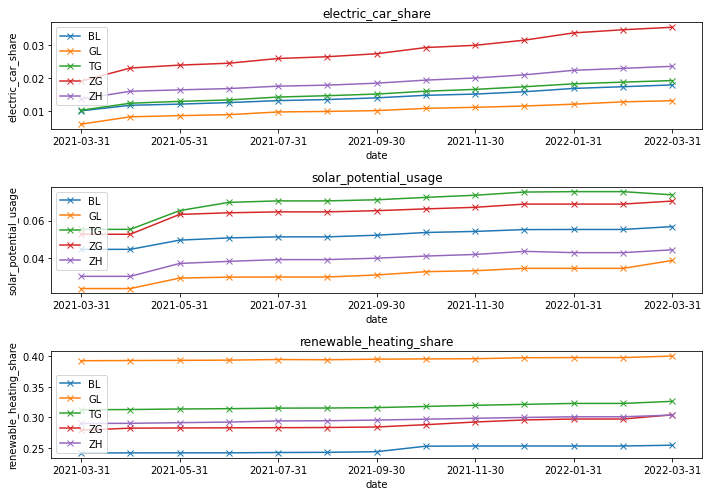

In [11]:
plot_time_series(df_canton, features , 'canton', sample_data = True)

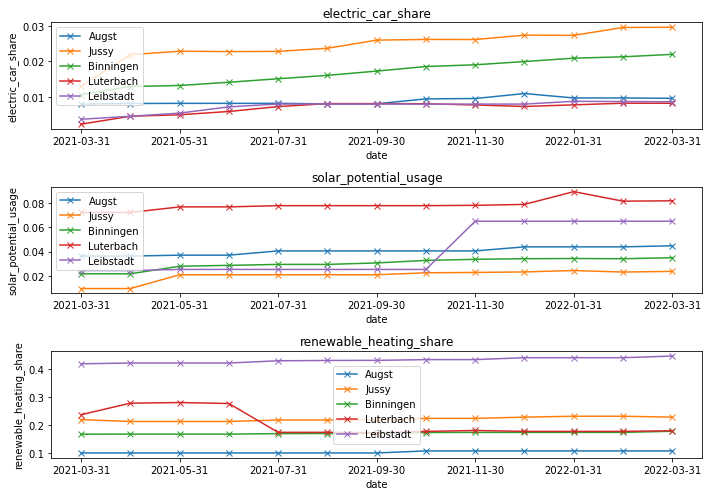

In [12]:
plot_time_series(df_municipality, features , 'municipality', sample_data = True)

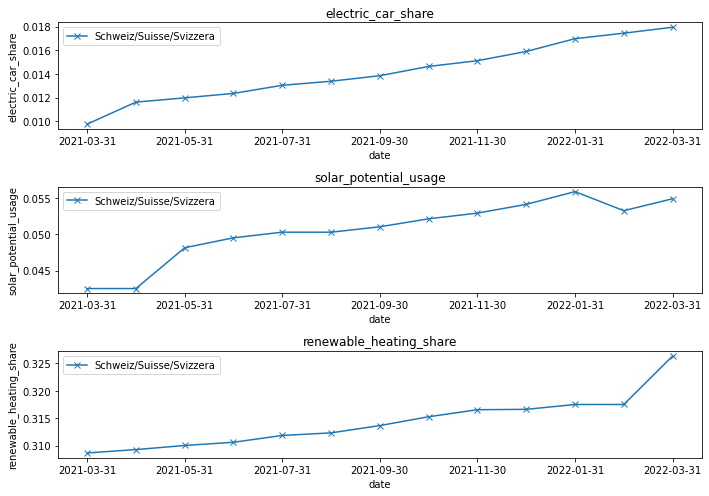

In [13]:
plot_time_series(df_nationality, features , 'country', sample_data = False)